<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
#ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

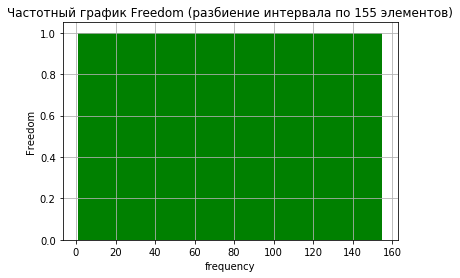

In [23]:
n, bins, patches = plt.hist(df['Freedom'], 155, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 155 элементов)')
plt.grid(True)
plt.show()

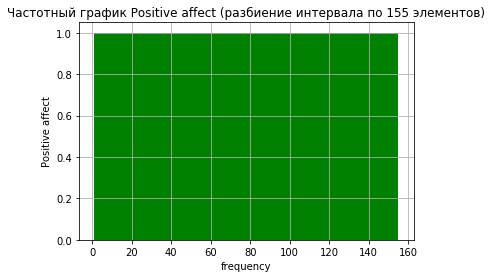

In [24]:
n, bins, patches = plt.hist(df['Positive affect'], 155, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 155 элементов)')
plt.grid(True)
plt.show()

In [ ]:
Данные распределения являются равномерными.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [25]:
# Проверка на выбросы из отсутствующих значений - есть одно пустое
df['Freedom'].isnull().sum()

1

In [22]:
# Исключение выброса для возможности расчета остальных статистик
df_freedom = df.loc[df['Freedom'] > 0, :]
df_freedom['Freedom'].isnull().sum()

0

In [13]:
statistics.mean(df_freedom['Freedom'])

78.0

In [14]:
statistics.median(df_freedom['Freedom'])

78.0

In [19]:
min(df_freedom['Freedom'])

1.0

In [20]:
max(df_freedom['Freedom'])

155.0

In [28]:
freedom_range = max(df_freedom['Freedom']) - min(df_freedom['Freedom'])
print(freedom_range)

154.0


In [26]:
statistics.pstdev(df_freedom['Freedom'])

44.74371464239419

In [27]:
statistics.pvariance(df_freedom['Freedom'])

2002.0

In [15]:
statistics.mode(df_freedom['Freedom'])

StatisticsError: no unique mode; found 155 equally common values

Почему нельзя найти моду?

In [ ]:
Потому что в колонке Freedom стоят ранги и соответственно все значения являются уникальными.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

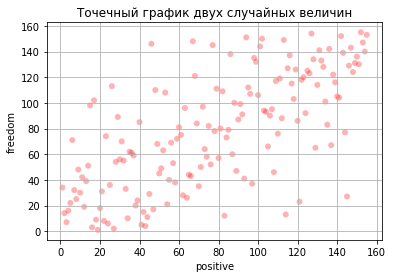

In [29]:
positive = df['Positive affect']
freedom = df['Freedom']
fig, ax = plt.subplots()
ax.scatter(positive, freedom, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('positive')
plt.ylabel('freedom')
plt.title('Точечный график двух случайных величин')
plt.show()

In [33]:
corr, p_value = pearsonr(df_freedom['Positive affect'], df_freedom['Freedom'])
print(corr)

0.6817698430601656


In [ ]:
Знак Коэффициента Пирсона говорит о наличии прямой линейной корреляции в 68% между параметрами Freedom и Positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [38]:
freedom = df_freedom['Freedom']
freedom_0 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_0))

0.0


In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_1 = min_max_scaler.fit_transform(np.array(freedom_0).reshape(-1, 1))
print(min(freedom_1))
print(max(freedom_1))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

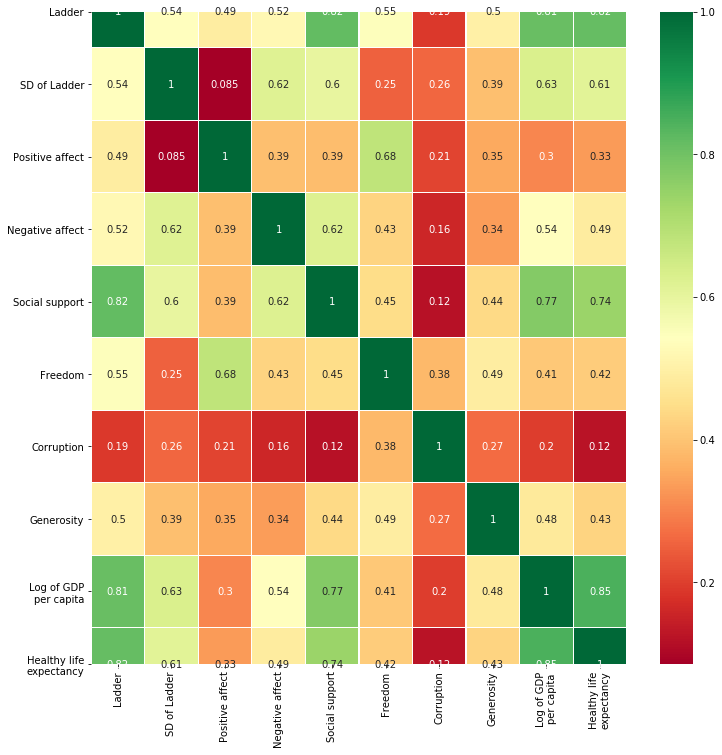

In [40]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [43]:
df_avocado=pd.read_csv('avocado.csv')
df_avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

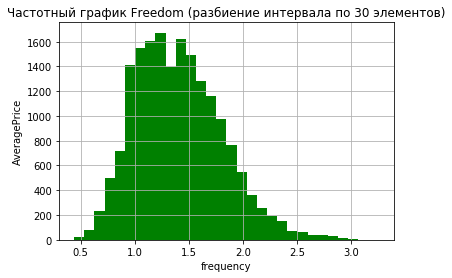

In [44]:
n, bins, patches = plt.hist(df_avocado['AveragePrice'], 30, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график Freedom (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

In [ ]:
Распределение близкое к нормальному, но со смещением

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [45]:
corr, p_value = pearsonr(df_avocado['AveragePrice'], df_avocado['4046'])
print(corr)

-0.20831704848788474


In [46]:
corr, p_value = pearsonr(df_avocado['AveragePrice'], df_avocado['4225'])
print(corr)

-0.17292777250933544


In [47]:
corr, p_value = pearsonr(df_avocado['AveragePrice'], df_avocado['4770'])
print(corr)

-0.17944598397975614


In [ ]:
Линейная корреляция по всем трем сортам авокадо есть, но очень низкая и обратная. 
Скорее всего это связано с тем, что если на какой-то сорт цена растет, то на остальные падает и в большей степени, 
чем тот на который растет.